### 🎬 **Project Title**: Movie Rating Prediction with Python

### **Objective**
The aim of this project is simple: **predict the rating of a movie** using its main features like **genre, director, and actors**. We’ll analyze historical movie data to understand what factors play the biggest role in determining movie ratings, and then build a **machine learning model** to predict these ratings accurately.

### **Why This Project?**
In today’s movie world, ratings are everything – they guide audiences on what to watch and help studios understand what’s working. By predicting movie ratings, we can see what aspects (like a movie’s genre or its cast) tend to lead to higher or lower ratings. This project will not only improve our data science skills but also give us insight into the movie industry’s rating trends.

### **Key Parts of the Project**

1. **Data Analysis**: First, we’ll **explore the movie data**, checking features like genre, director, and actors. This will give us a good understanding of what the data looks like and which features might be important for ratings.

2. **Data Preprocessing**: This is the step where we prepare the data to make it clean and useful. We’ll handle missing values, format the data correctly, and encode any text data (like the genre or director) so the machine learning model can understand it.

3. **Feature Engineering**: Here, we’ll refine the data further by creating new features if needed or by transforming the current features to make them more effective for our prediction model.

4. **Model Building with Regression**: Using machine learning, we’ll apply **regression techniques** – these are methods that help us make continuous predictions, like predicting ratings. We’ll test different models and choose the best one for accurate results.

5. **Insights and Analysis**: Finally, we’ll review our results to see what factors most affect movie ratings. This is where we’ll understand trends and patterns, like if certain genres score higher or if specific directors or actors influence ratings.

### **Expected Outcome**
By the end of this project, we’ll have a working model that can estimate movie ratings based on features like genre and cast. Plus, we’ll gain valuable insights into what truly influences movie ratings – knowledge that’s valuable for anyone interested in data science, movies, or both!

#### Before jumping into the actual model building, let’s first understand our dataset, bhaiyon aur behno! This step is super important because, just like in cricket, if you don’t understand the pitch (dataset), you can’t play the game (build the model) well. So, let’s take this step-by-step:

In Python, libraries are like specialized toolkits. Each library has its own unique tools that make data analysis, visualization, and modeling easier. So, let’s import the key ones we’ll need for this project:

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 🛠 Why Importing Libraries First is Important
Importing libraries at the start helps us access all the functions we need without interruptions. It’s like setting up your workspace with all the tools in place – ready to tackle each step smoothly.

In [7]:
dataset_path = r'C:\Users\abhis\Documents\GitHub\walmart sales forecasting\MovieMind-Rating-Prediction\Data\IMDb Movies India.csv'
movie_data = pd.read_csv(dataset_path, encoding='ISO-8859-1')

 Display the first 5 rows of the dataset to verify the data loaded correctly

In [8]:
print("First 5 Rows of the Movie Dataset:")
print(movie_data.head())

First 5 Rows of the Movie Dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy 

Get an overview of the dataset's structure and data types

In [9]:
print("\nDataset Overview:")
print(movie_data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


Show a statistical summary for numerical columns

In [10]:
print("\nStatistical Summary of Numerical Data:")
print(movie_data.describe())


Statistical Summary of Numerical Data:
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


encoding issue while reading the CSV file. Sometimes, files use encodings other than UTF-8, which can cause this type of error in Pandas.

### Explanation of the Fix

- **Encoding Change (`encoding='ISO-8859-1'`)**:
  - We specify `ISO-8859-1` encoding in `pd.read_csv()`. This encoding is often compatible with CSV files that contain special characters, particularly those from non-UTF-8 encoded sources.

This should resolve the UnicodeDecodeError, allowing the data to load without issues.

We’ll focus on understanding our data in more detail, such as by examining column names, checking for any missing values, and identifying the data types of each column. 

Checking for any missing values in the dataset

In [11]:
print("\nMissing Values Count in Each Column:")
print(movie_data.isnull().sum())


Missing Values Count in Each Column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


Displaying the column names to understand what features we have

In [12]:
print("\nColumn Names in the Dataset:")
print(movie_data.columns)


Column Names in the Dataset:
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


Getting the unique values in each categorical column (e.g., Genre, Director)

In [14]:
# Correcting the actor columns to display unique values
print("\nUnique Values in Key Categorical Columns:")
print("Genres:", movie_data['Genre'].unique()[:10])  # Display first 10 unique genres
print("Directors:", movie_data['Director'].unique()[:10])  # Display first 10 unique directors
print("Actor 1:", movie_data['Actor 1'].unique()[:10])  # Display first 10 unique actors
print("Actor 2:", movie_data['Actor 2'].unique()[:10])  # Display first 10 unique actors
print("Actor 3:", movie_data['Actor 3'].unique()[:10])  # Display first 10 unique actors


Unique Values in Key Categorical Columns:
Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller']
Directors: ['J.S. Randhawa' 'Gaurav Bakshi' 'Soumyajit Majumdar' 'Ovais Khan'
 'Amol Palekar' 'Rahul Rawail' 'Shoojit Sircar' 'Anirban Datta'
 'Allyson Patel' 'Biju Bhaskar Nair']
Actor 1: ['Manmauji' 'Rasika Dugal' 'Sayani Gupta' 'Prateik' 'Rajat Kapoor'
 'Bobby Deol' 'Jimmy Sheirgill' nan 'Yash Dave' 'Augustine']
Actor 2: ['Birbal' 'Vivek Ghamande' 'Plabita Borthakur' 'Ishita Raj'
 'Rituparna Sengupta' 'Aishwarya Rai Bachchan' 'Minissha Lamba' nan
 'Muntazir Ahmad' 'Fathima Babu']
Actor 3: ['Rajendra Bhatia' 'Arvind Jangid' 'Roy Angana' 'Siddhant Kapoor'
 'Antara Mali' 'Shammi Kapoor' 'Yashpal Sharma' nan 'Kiran Bhatia' 'Byon']


-  Handling Missing Values: We need to decide how to handle the missing values in various columns. For instance, we might drop rows with missing Rating since it's our target variable, or we could fill missing Genre values with a placeholder.

-  Converting Data Types: Some columns, like Year and Duration, may require conversion to appropriate formats (e.g., extracting numerical values).

-  Feature Engineering: We might also want to extract additional features from existing columns. For example, we can extract the numeric value from Duration to create a separate column for duration in minutes.

In [15]:
cleaned_movie_data = movie_data.dropna(subset=['Rating'])

In [16]:
cleaned_movie_data['Year'] = cleaned_movie_data['Year'].str.extract('(\d+)').astype(int)

In [18]:
cleaned_movie_data['Duration'] = cleaned_movie_data['Duration'].str.extract('(\d+)')

cleaned_movie_data['Duration'] = pd.to_numeric(cleaned_movie_data['Duration'], errors='coerce')

In [19]:
cleaned_movie_data['Duration'].fillna(0, inplace=True)

In [20]:
print(cleaned_movie_data[['Duration']].head())

   Duration
1     109.0
3     110.0
5     147.0
6     142.0
8      82.0


In [21]:
print(cleaned_movie_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int32  
 2   Duration  7919 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 649.6+ KB
None


## Further Analysis or Data Manipulation

In [22]:
genre_summary = cleaned_movie_data.groupby('Genre').agg({'Rating': 'mean', 'Duration': 'mean'}).reset_index()
print(genre_summary)

                            Genre    Rating    Duration
0                          Action  5.092566   56.254197
1               Action, Adventure  5.558333  105.791667
2    Action, Adventure, Biography  7.800000  100.000000
3       Action, Adventure, Comedy  5.610000  134.350000
4        Action, Adventure, Crime  5.556250   83.250000
..                            ...       ...         ...
427              Thriller, Action  4.300000  129.000000
428    Thriller, Musical, Mystery  7.100000  158.000000
429             Thriller, Mystery  6.533333  102.333333
430     Thriller, Mystery, Family  6.100000  142.000000
431                           War  4.333333  133.666667

[432 rows x 3 columns]


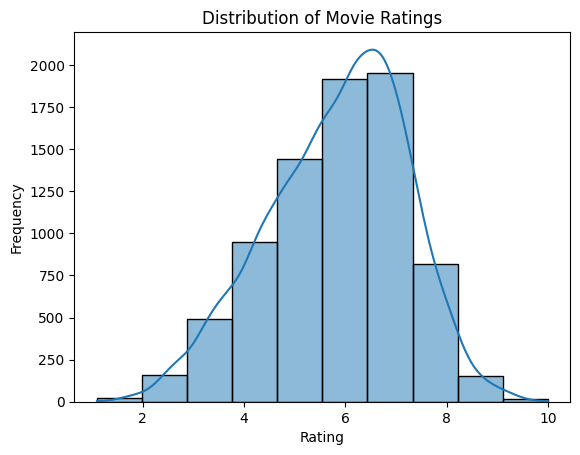

In [25]:
sns.histplot(cleaned_movie_data['Rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

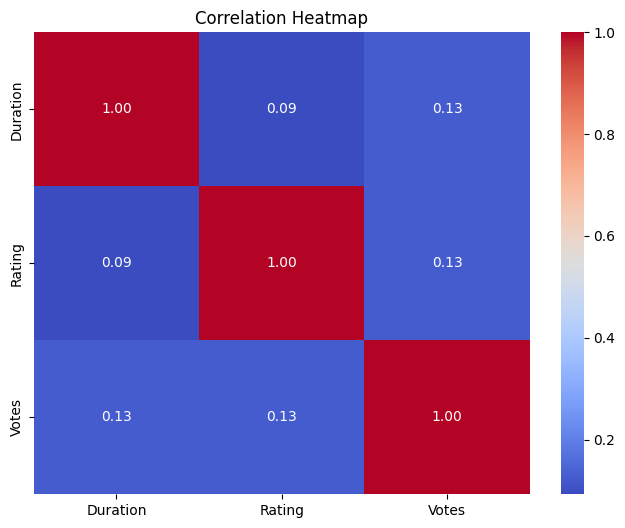

In [28]:
cleaned_movie_data['Votes'] = cleaned_movie_data['Votes'].str.replace(',', '').astype(float)
cleaned_movie_data.dropna(subset=['Duration', 'Rating', 'Votes'], inplace=True)
correlation_matrix = cleaned_movie_data[['Duration', 'Rating', 'Votes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
genre_counts = cleaned_movie_data['Genre'].value_counts()

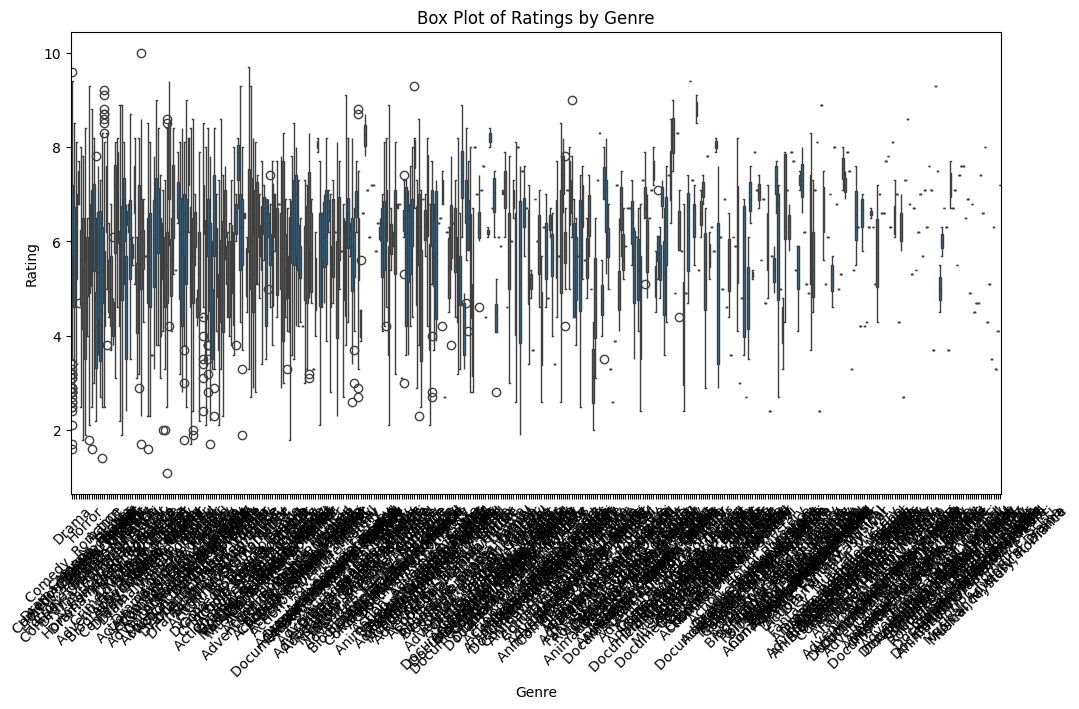

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_movie_data, x='Genre', y='Rating')
plt.xticks(rotation=45)
plt.title('Box Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

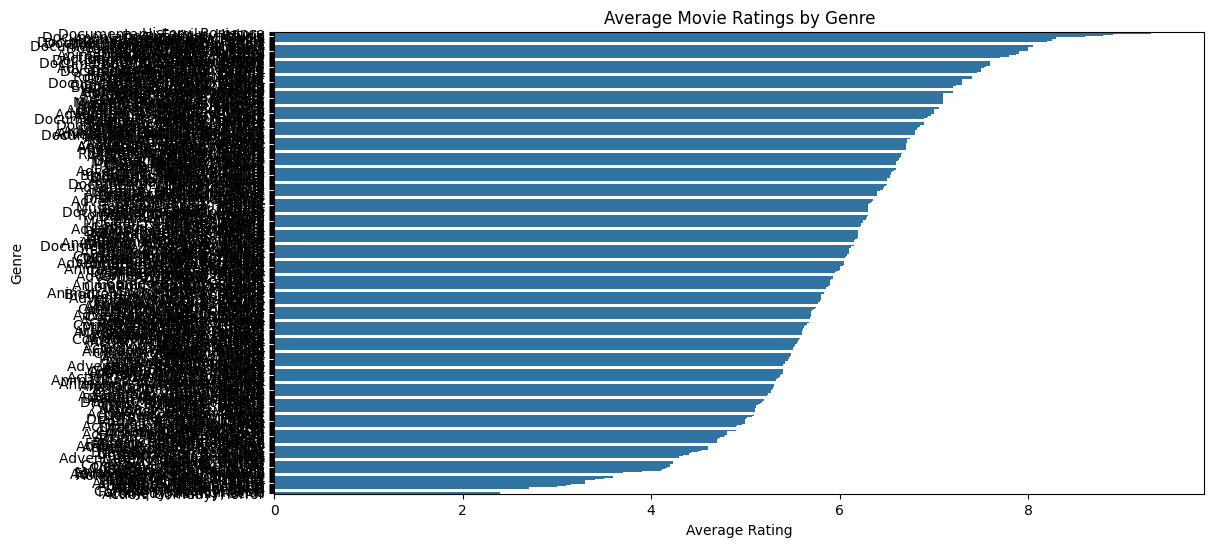

In [31]:
exploded_genres = cleaned_movie_data.explode('Genre')
genre_ratings = exploded_genres.groupby('Genre')['Rating'].mean().reset_index()

# Plot the average ratings per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Genre', data=genre_ratings.sort_values('Rating', ascending=False))
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

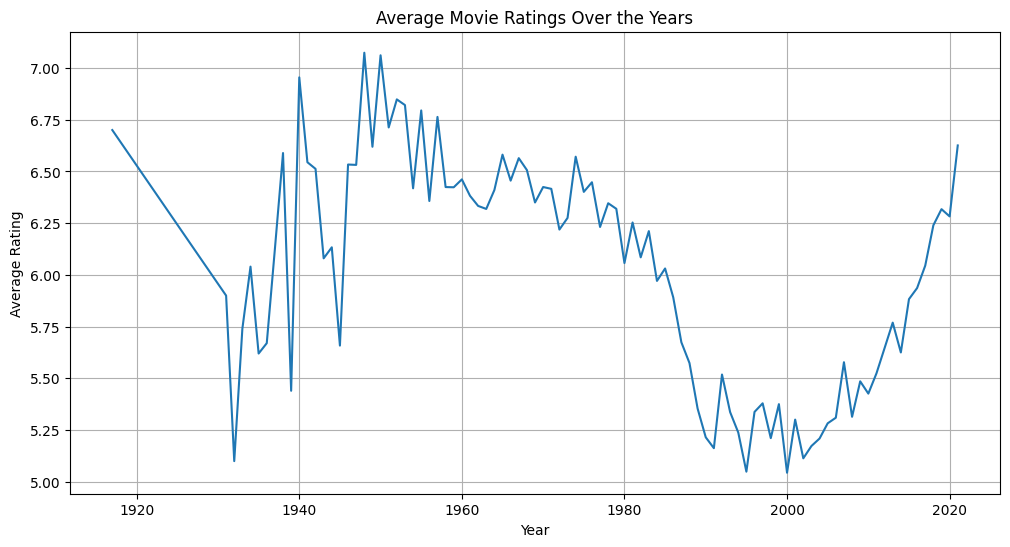

In [32]:
cleaned_movie_data['Year'] = pd.to_numeric(cleaned_movie_data['Year'], errors='coerce')
yearly_ratings = cleaned_movie_data.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rating', data=yearly_ratings)
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Prepare the dataset
features = cleaned_movie_data[['Duration', 'Votes']].dropna()
target = cleaned_movie_data.loc[features.index, 'Rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.8612943756382894
R² Score: 0.03164924223675969


In [40]:
# Fill missing ratings with the mean
cleaned_movie_data['Rating'].fillna(cleaned_movie_data['Rating'].mean(), inplace=True)

# You can also choose to drop rows with missing values in critical columns
cleaned_movie_data.dropna(subset=['Duration', 'Genre', 'Director'], inplace=True)

In [41]:
features_for_clustering = cleaned_movie_data[['Duration', 'Rating', 'Votes']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

In [42]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_features)

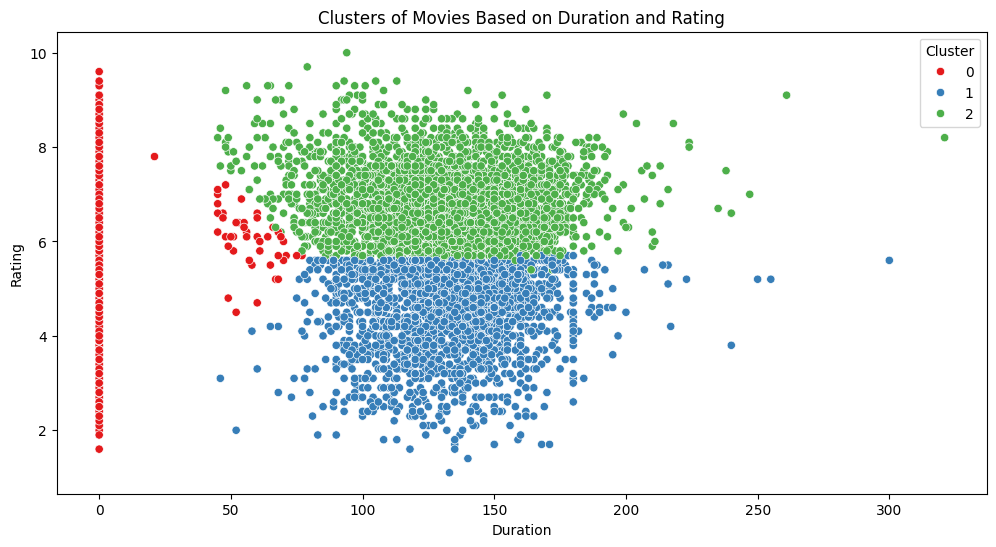

In [43]:
cleaned_movie_data['Cluster'] = None
cleaned_movie_data.loc[features_for_clustering.index, 'Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration', y='Rating', hue='Cluster', data=cleaned_movie_data, palette='Set1')
plt.title('Clusters of Movies Based on Duration and Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()